# Section 1: Introduction:
In today's competitive business landscape, retaining customers is more crucial than ever. Companies often invest heavily in acquiring new customers, yet the cost of losing an existing customer can be even greater.

Understanding the factors that lead to customer churn—when a customer decides to stop using a service—is essential for creating effective retention strategies. Imagine having the power to predict which customers are at risk of leaving, enabling you to proactively address their needs and concerns before they decide to go.

<center><img src="https://www.cleartouch.in/wp-content/uploads/2022/11/Customer-Churn.png" width=500/></center>

By analyzing a comprehensive dataset that includes customer demographics, account details, and the services they've subscribed to, you can uncover the underlying reasons for churn. This knowledge allows businesses to tailor their retention programs, offering personalized solutions that enhance customer satisfaction and loyalty, ultimately driving long-term growth and profitability. Let's harness the power of data to not only understand why customers leave but to keep them engaged and committed to your brand.

# Section 2: Import the necessary Libraries

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Section 3: Loading the Data

Download the data [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

**Dataset Information:**

**Content:**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called `Churn`.
- ervices that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents.

In [65]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/AIML/CHURN/')
df = pd.read_csv('../../../../Downloads/Customer-Churn.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Loading the data

# Viewing the data
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (7043, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

In [67]:
# Remove the column - 'customerID'
df = df.drop(['customerID'], axis=1)

In [68]:
# Checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Section 4: EDA
EDA is the process of analyzing and visualizing the dataset to uncover underlying patterns, trends, and relationships. It helps in understanding the data's structure and guiding the feature selection and modeling process.

## 4.1 Check the distribution of the target variable - `Churn`.


Churn distribution:



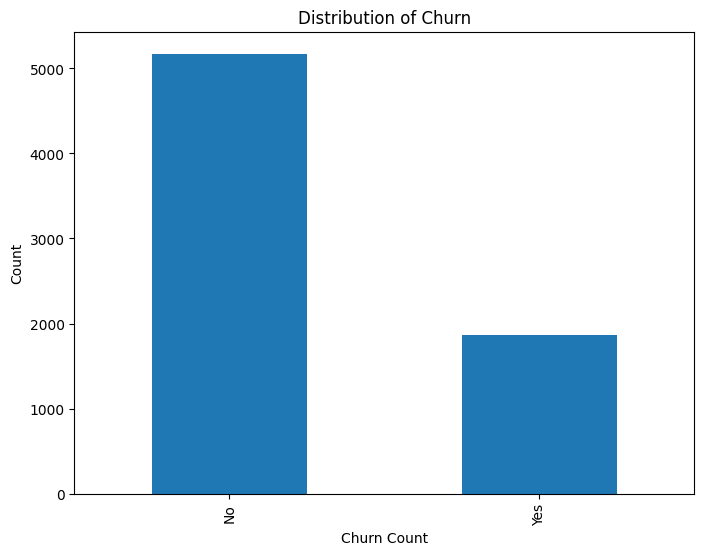

In [69]:
# Check the distribution of the target variable
print('Churn distribution:\n')
churn = df['Churn'].value_counts()

plt.figure(figsize=(8,6))
churn.plot(kind='bar')
plt.title('Distribution of Churn')
plt.xlabel("Churn Count")
plt.ylabel('Count')
plt.show()

## 4.2 Do an analysis of the churn rate wrt all the categorical variables

*Hint: Use normalized values to plot to avoid the class imbalance problem.*

In [70]:
# Analyze churn rate by categorical features
# Listing all the categorical columns
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]


def churn_rate(df, col):
  return pd.crosstab(df[col], df['Churn'], normalize='index') * 100


for col in categorical_columns :
  print(f"col name: {col}, numer of datatype: {df[col].nunique()}")
  chr_rate = churn_rate(df, col)
  print(f"\nChurn rate by {col}:")
  print(round(chr_rate, 2))

col name: gender, numer of datatype: 2

Churn rate by gender:
Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16
col name: SeniorCitizen, numer of datatype: 2

Churn rate by SeniorCitizen:
Churn             No    Yes
SeniorCitizen              
0              76.39  23.61
1              58.32  41.68
col name: Partner, numer of datatype: 2

Churn rate by Partner:
Churn       No    Yes
Partner              
No       67.04  32.96
Yes      80.34  19.66
col name: Dependents, numer of datatype: 2

Churn rate by Dependents:
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45
col name: PhoneService, numer of datatype: 2

Churn rate by PhoneService:
Churn            No    Yes
PhoneService              
No            75.07  24.93
Yes           73.29  26.71
col name: MultipleLines, numer of datatype: 3

Churn rate by MultipleLines:
Churn                No    Yes
MultipleLines                 
No                74.96 

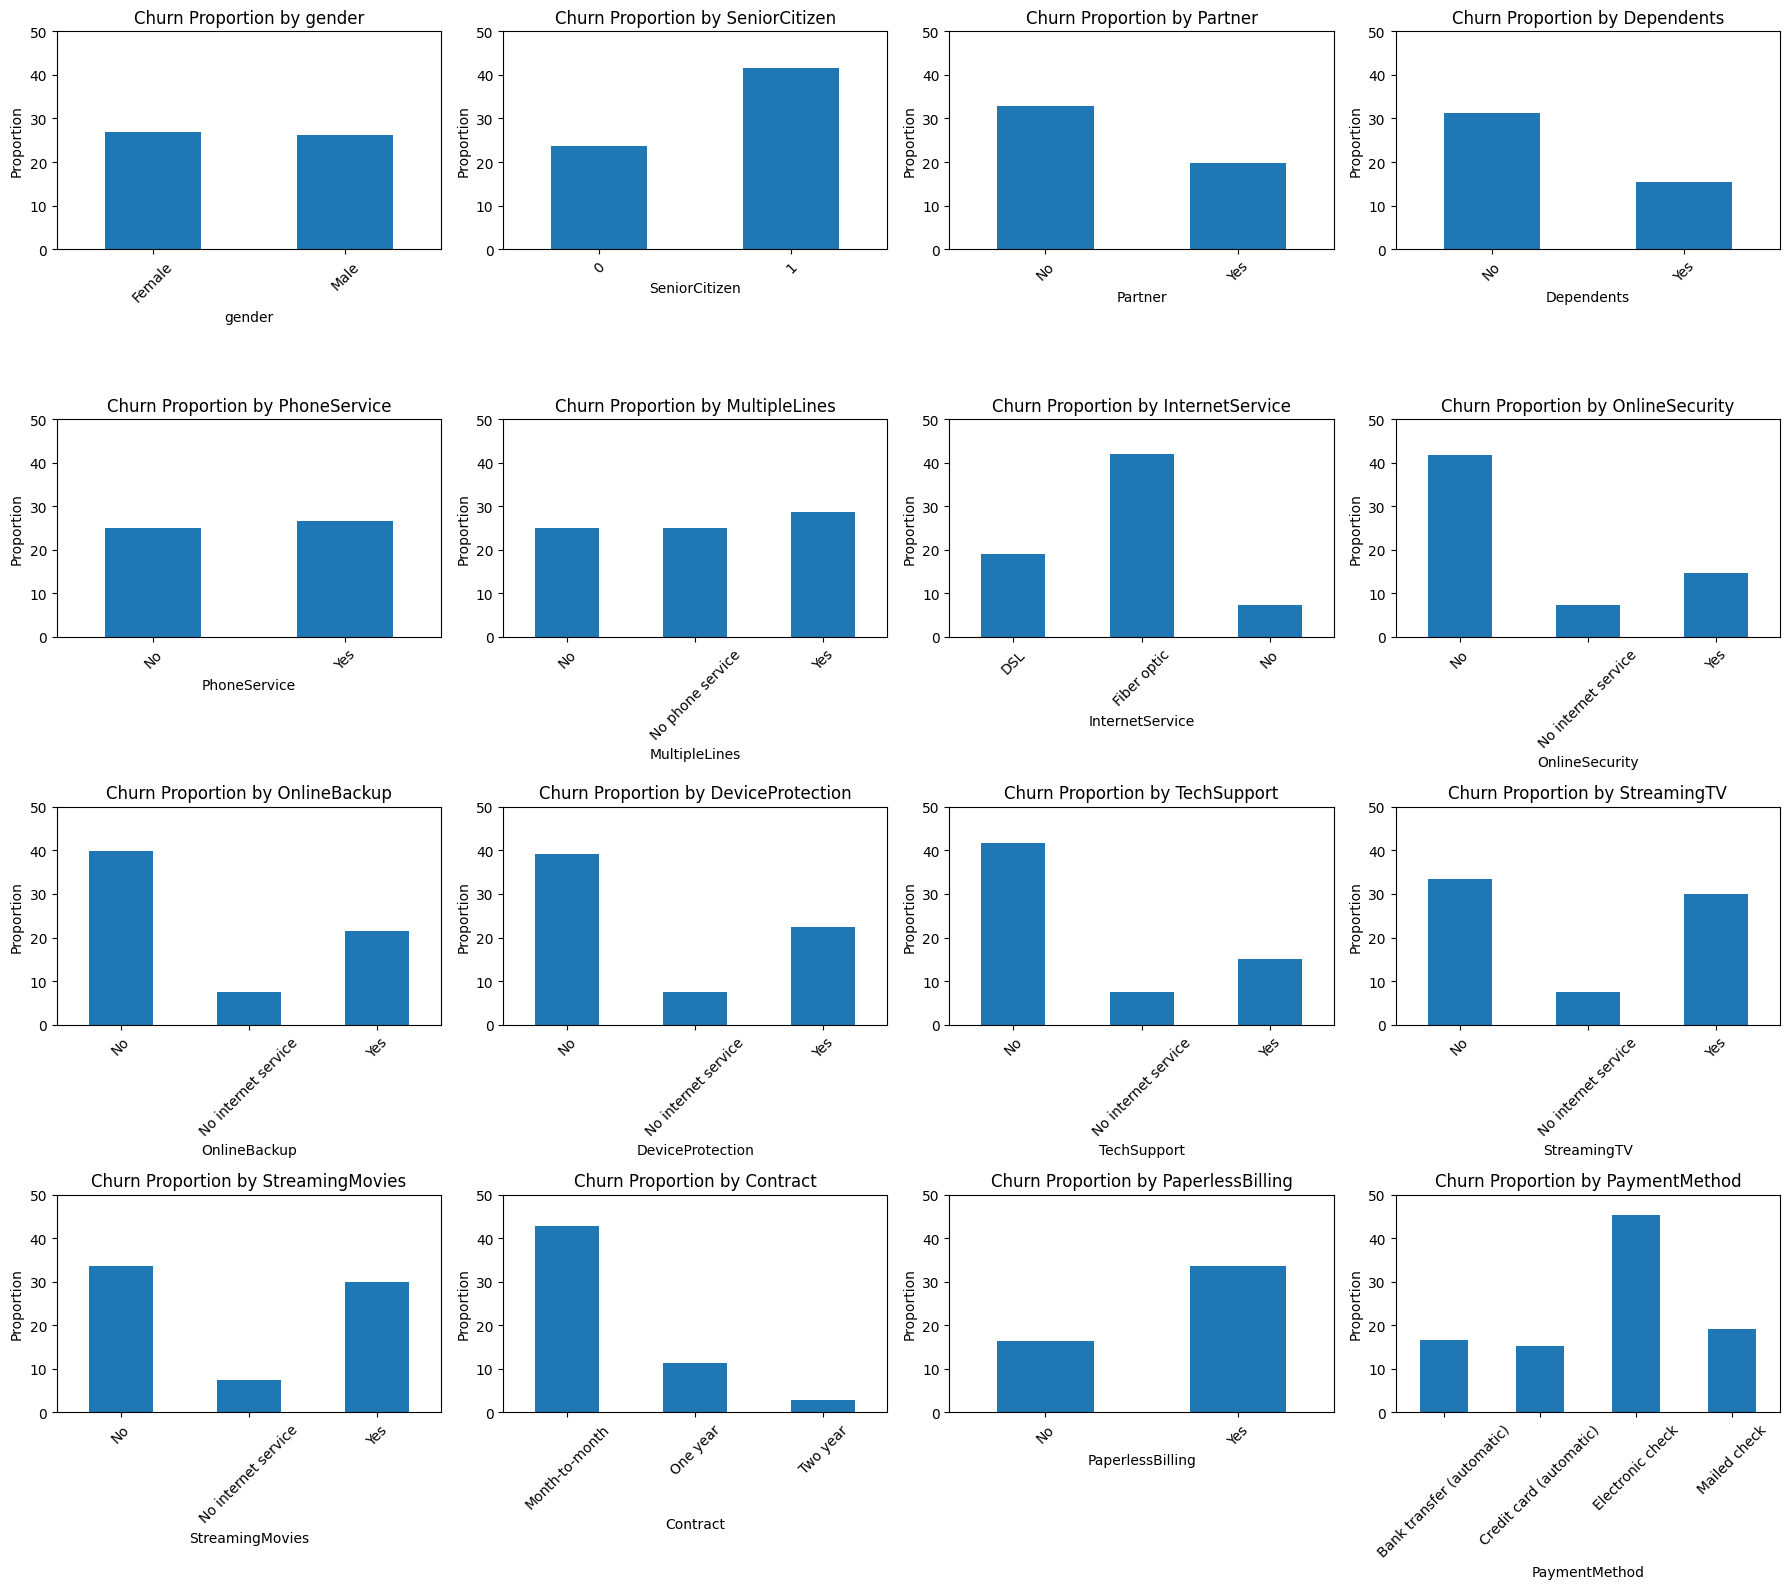

In [71]:

# Visualize the data
# Set up the subplot grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Plot each categorical feature in a subplot
for i, column in enumerate(categorical_columns):
    # Calculate normalized proportions because of class imbalance
    # normalized_counts = (
    #     df.groupby(column)['Churn']
    #     .value_counts(normalize=True)
    #     .unstack()
    # )

    # Plotting the normalized counts as bar plots
    churn_rate(df, column)['Yes'].plot(kind='bar', ax=axes[i])
    # Set title and labels
    axes[i].set_title(f"Churn Proportion by {column}")
    axes[i].set_ylabel('Proportion')
    axes[i].set_ylim(0, 50)
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


# Section 5: Feature Engineering

## 5.1 Convert `TotalCharges` column to numeric

In [72]:
# Converting TotalCharges to numeric
df['TotalCharges'].head()
print(df['TotalCharges'].unique())
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# or
# df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# df['TotalCharges'] = df['TotalCharges'].astype(float)
print(df['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


## 5.2 Handle the categorical features by converting them to dummies

In [73]:
# One-hot encoding of the categorical features
df_encoded = pd.get_dummies(df, categorical_columns, drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   SeniorCitizen                             7043 non-null   int64  
 1   tenure                                    7043 non-null   int64  
 2   MonthlyCharges                            7043 non-null   float64
 3   TotalCharges                              7032 non-null   float64
 4   gender_Male                               7043 non-null   bool   
 5   SeniorCitizen_Yes                         7043 non-null   bool   
 6   Partner_Yes                               7043 non-null   bool   
 7   Dependents_Yes                            7043 non-null   bool   
 8   PhoneService_No phone service             7043 non-null   bool   
 9   PhoneService_Yes                          7043 non-null   bool   
 10  MultipleLines_Fiber optic           

## 5.3 Encode the `Churn` column
- `Yes` as 1
- `No` as 0

In [74]:
# Encode the 'Churn' column
print(df['Churn'].unique())
df['Churn'] = df["Churn"].replace('Yes', 1)
df['Churn'] = df["Churn"].replace('No', 0)
df['Churn'] = df['Churn'].astype(int)
print(df['Churn'].unique())

['No' 'Yes']
[0 1]


/tmp/ipython-input-4212638440.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df["Churn"].replace('No', 0)


## 5.4 Do a correlation analysis of the dataset

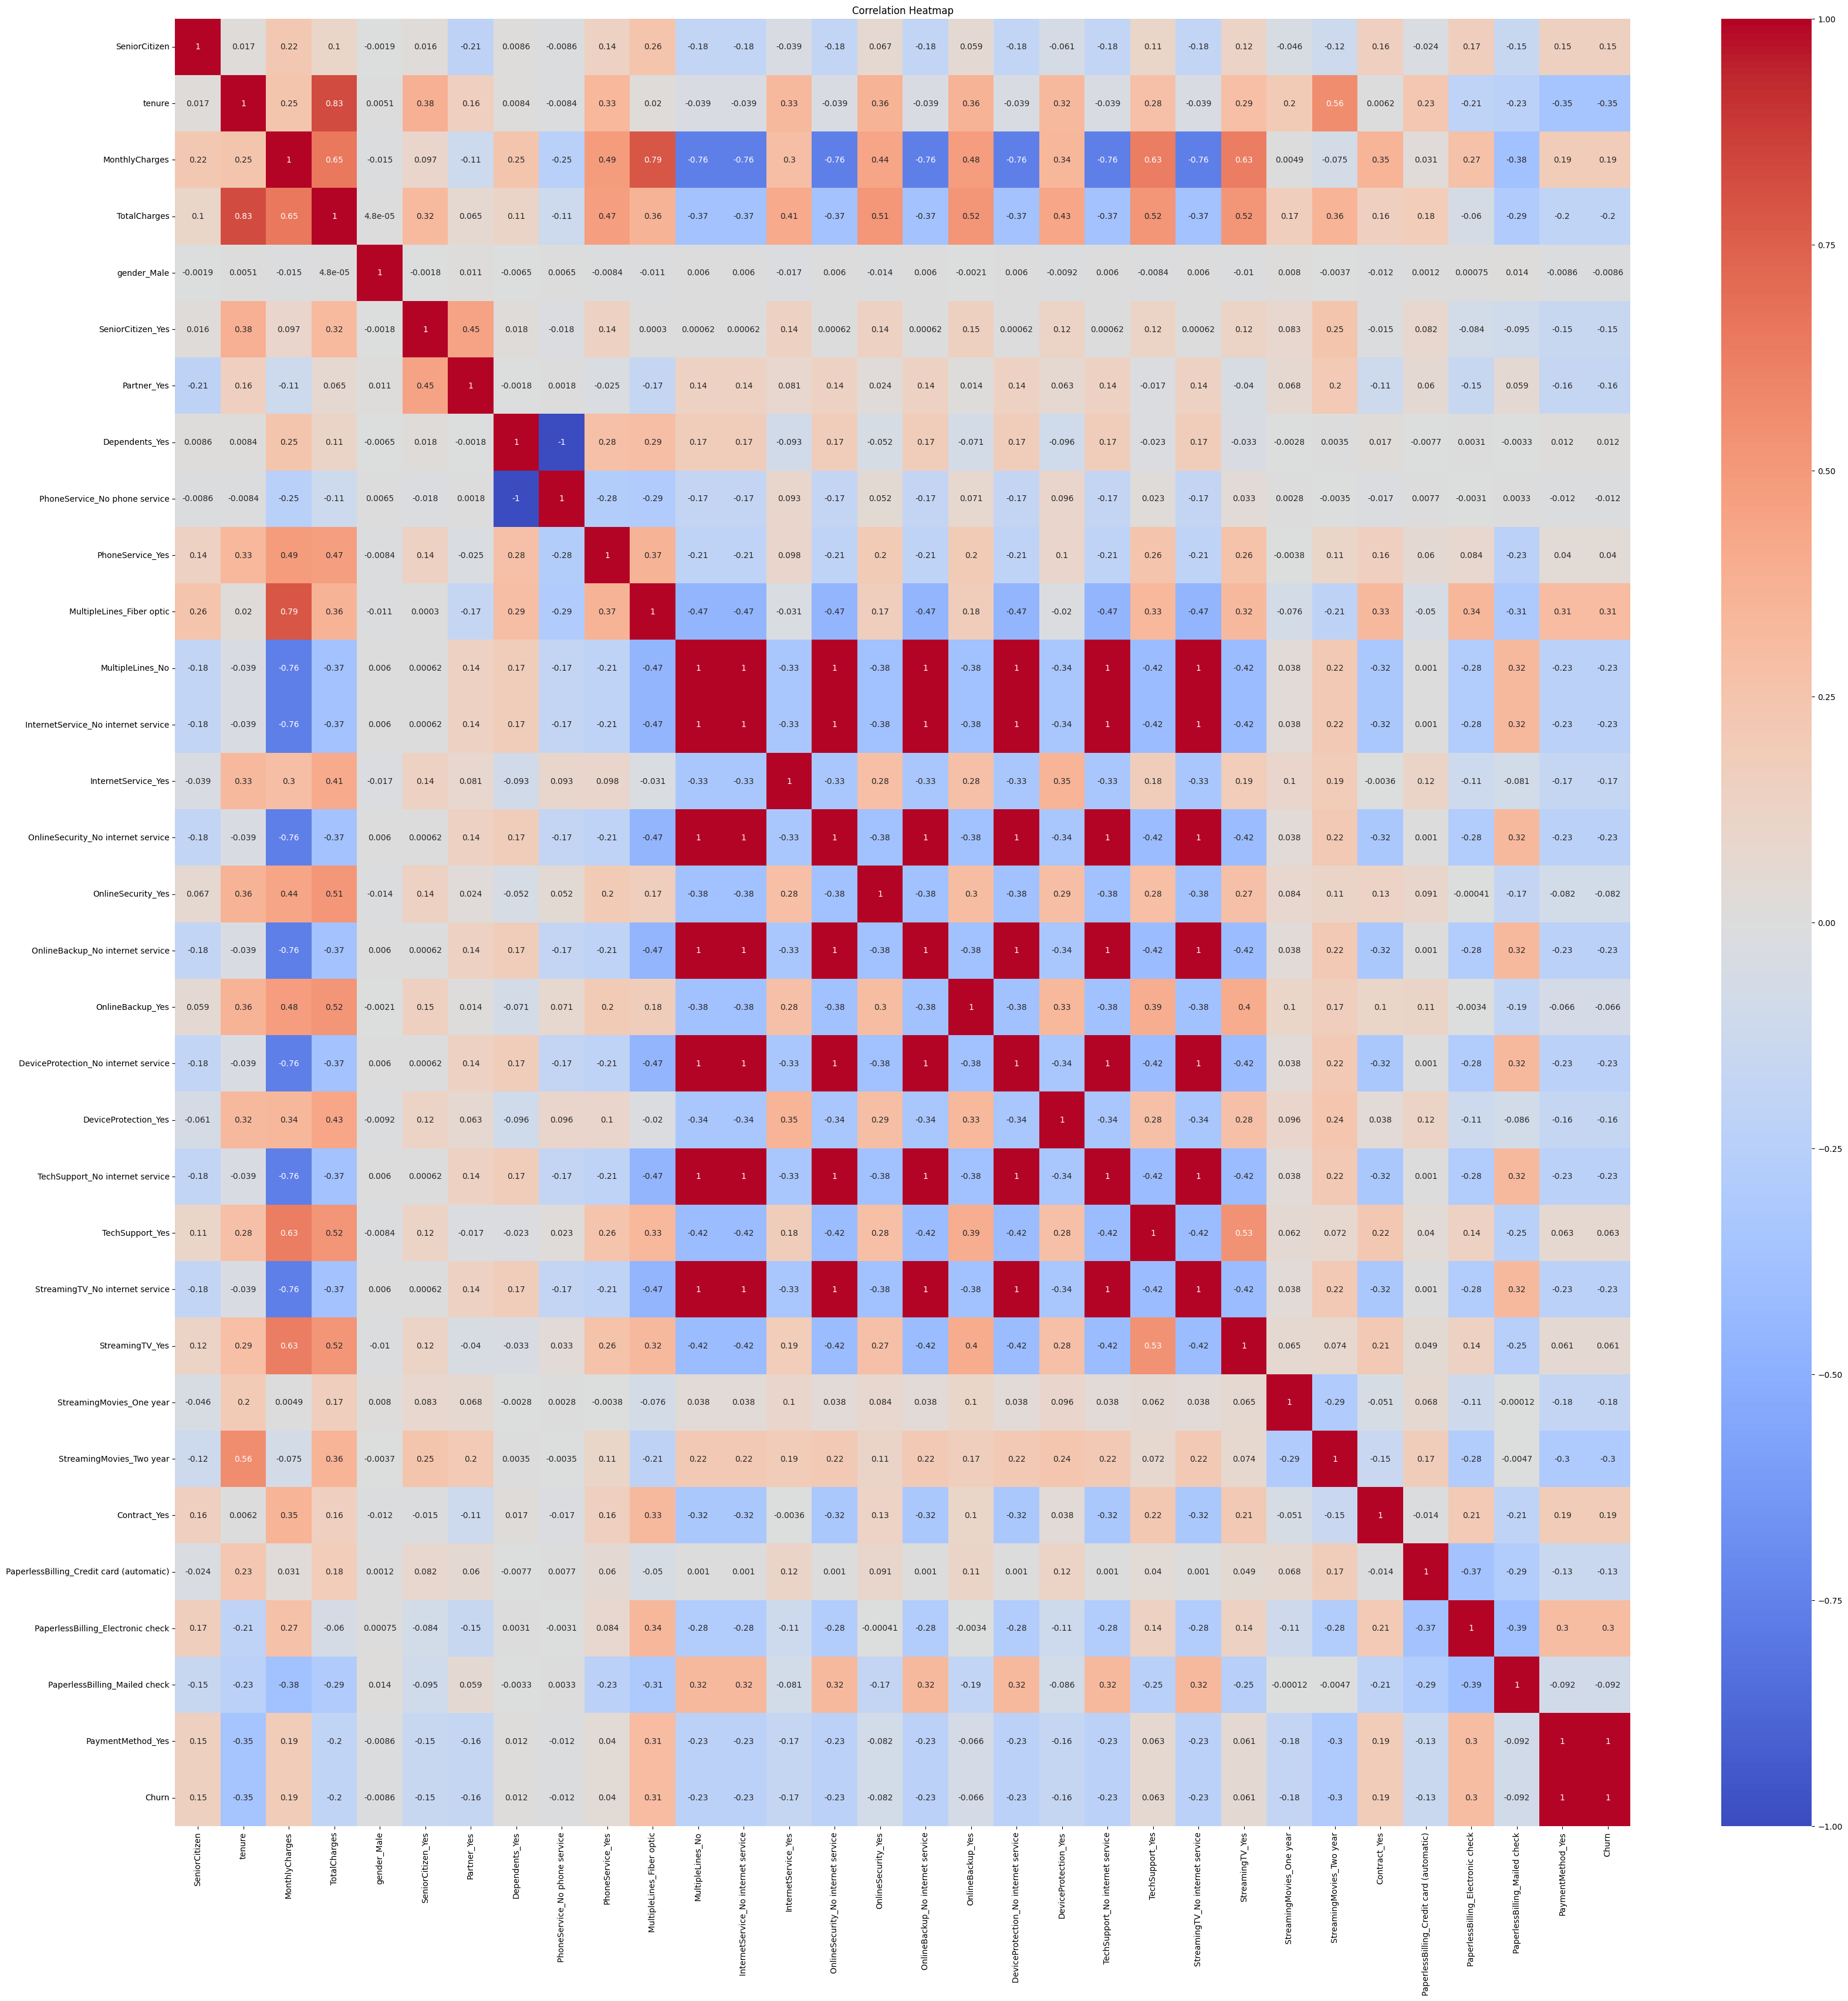

In [75]:
# Create a heatmap displying the correlation coefficients of the variables
df_encoded = df_encoded.copy()
df_encoded['Churn'] = df['Churn']
corr = df_encoded.corr()

plt.figure(figsize=(40, 40))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

## 5.5 Check for null values & handle them

In [76]:
# Checking the null values
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [77]:
# Imputing with the mean
# Calculating the mean of the data
tc_mean = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(tc_mean)
df_encoded['TotalCharges'] = df['TotalCharges']
# Impute the mean

df['TotalCharges'].isna().sum()
# Check the data

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_No phone service,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_One year,StreamingMovies_Two year,Contract_Yes,PaperlessBilling_Credit card (automatic),PaperlessBilling_Electronic check,PaperlessBilling_Mailed check,PaymentMethod_Yes,Churn
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,0
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,0
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,1
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,0
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,1


# Section 6: Model Building

## 6.1 Split the data into train and test

In [78]:
# Define a function to split the data
def split_data(df: pd.DataFrame, target: str, test_size: float):
    # Create 'X'
  X = df_encoded.drop(target, axis=1)

    # Create 'y'
  y = df_encoded[target]

    # Split into train & test
  return train_test_split(X, y, test_size=test_size, random_state=42)


In [79]:
# Call the function to split the data
X_train, X_test, y_train, y_test = split_data(df_encoded, 'Churn', 0.2)

In [80]:
# Check the data
print("=== TRAIN-TEST SPLIT CHECK ===")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts()}")
print(f"y_test distribution:\n{y_test.value_counts()}")

=== TRAIN-TEST SPLIT CHECK ===
X_train shape: (5634, 31)
X_test shape: (1409, 31)
y_train distribution:
Churn
0    4138
1    1496
Name: count, dtype: int64
y_test distribution:
Churn
0    1036
1     373
Name: count, dtype: int64


## 6.2 Scale the data

In [81]:
# Scaling the data
num_list = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[num_list] = scaler.fit_transform(X_train[num_list])
X_test[num_list] = scaler.fit_transform(X_test[num_list])

## 6.3 Build the Logistic Regression Model & check the metrics

In [87]:
# Building the logistic regression model
model_log = LogisticRegression(random_state=42)
model_log.fit(X_train, y_train)
 # Probability of churn
# Make predictions
y_pred_log = model_log.predict(X_test)
y_pred_proba = model_log.predict_proba(X_test)[:, 1]
probabilities = model_log.predict_proba(X_test)


PaymentMethod_Yes unique values:
[False  True]

Crosstab PaymentMethod_Yes vs Churn:
Churn                 0     1
PaymentMethod_Yes            
False              4138     0
True                  0  1496

Perfect match: True


In [89]:
# Print the classification report
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Confusion Matrix:
[[1036    0]
 [   0  373]]


In [96]:
# Check if Churn is accidentally in your features
print("Columns in X_train:")
print(X_train.columns.tolist())
print(f"'Churn' in X_train: {'Churn' in X_train.columns}")

for col in X_train.columns:
    correlation = X_train[col].corr(y_train)
    if abs(correlation) > 0.95:
        print(f"High correlation: {col} = {correlation:.3f}")

# Check what PaymentMethod_Yes actually represents
print("PaymentMethod_Yes unique values:")
print(X_train['PaymentMethod_Yes'].unique())

# Cross-tabulation to see the relationship
print("\nCrosstab PaymentMethod_Yes vs Churn:")
print(pd.crosstab(X_train['PaymentMethod_Yes'], y_train))

# Check if it's identical to target
print(f"\nPerfect match: {(X_train['PaymentMethod_Yes'] == y_train).all()}")

Columns in X_train:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_No phone service', 'PhoneService_Yes', 'MultipleLines_Fiber optic', 'MultipleLines_No', 'InternetService_No internet service', 'InternetService_Yes', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_One year', 'StreamingMovies_Two year', 'Contract_Yes', 'PaperlessBilling_Credit card (automatic)', 'PaperlessBilling_Electronic check', 'PaperlessBilling_Mailed check', 'PaymentMethod_Yes']
'Churn' in X_train: False
High correlation: PaymentMethod_Yes = 1.000
PaymentMethod_Yes unique values:
[False  True]

Crosstab PaymentMethod_Yes vs Churn:
Churn                 0     1
Payme

In [97]:
X_train_fixed = X_train.drop('PaymentMethod_Yes', axis=1)
X_test_fixed = X_test.drop('PaymentMethod_Yes', axis=1)

# Retrain model without the leaky feature
model_log_fixed = LogisticRegression(random_state=42)
model_log_fixed.fit(X_train_fixed, y_train)
y_pred_fixed = model_log_fixed.predict(X_test_fixed)


Fixed Accuracy: 0.8219


In [98]:

accuracy = accuracy_score(y_test, y_pred_fixed)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_fixed))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_fixed))

Logistic Regression Accuracy: 0.8219

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Confusion Matrix:
[[935 101]
 [150 223]]


## 6.4 Build a KNN model & Check the metrics

In [103]:
# Initialize the KNN model
model_knn = KNeighborsClassifier(n_neighbors=15)

# Fit the model
model_knn.fit(X_train_fixed, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test_fixed)

# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN model Accuracy: {accuracy:.4f}")

print("\nKNN model Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nKNN model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN model Accuracy: 0.8091

KNN model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.57      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


KNN model Confusion Matrix:
[[928 108]
 [161 212]]


In [104]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_fixed, y_train)
print(f"Best k: {grid_search.best_params_}")

Best k: {'n_neighbors': 15}


## 6.5 Handle the class imbalance  & check the metrics

In [106]:
# Importing the necessary libraries
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_fixed, y_train)
# Initialize the Logistic Regression model
model_log_sm = LogisticRegression(random_state=42)

# Fit the model on the smoted data
model_log_sm.fit(X_train_sm, y_train_sm)

# Predict on the testing set
y_pred_sm = model_log_sm.predict(X_test_fixed)

# Print the classification report
accuracy_smote = accuracy_score(y_test, y_pred_sm)
print(f"Logistic Regression (SMOTE) Accuracy: {accuracy_smote:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_sm))


Logistic Regression (SMOTE) Accuracy: 0.7686

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1036
           1       0.55      0.72      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409


Confusion Matrix:
[[815 221]
 [105 268]]


In [107]:
# Initialize the KNN model

model_knn_sm = KNeighborsClassifier(n_neighbors= 15)
# Fit the model on smoted data
model_knn_sm.fit(X_train_sm, y_train_sm)

# Make predictions
y_pred_knn_sm = model_knn_sm.predict(X_test_fixed)

# Evaluation of the model
accuracy_knn_sm = accuracy_score(y_test, y_pred_knn_sm)
print(f"KNN Regression (SMOTE) Accuracy: {accuracy_knn_sm:.4f}")
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn_sm))
print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn_sm))


KNN Regression (SMOTE) Accuracy: 0.7289

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1036
           1       0.49      0.81      0.61       373

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.73      0.74      1409


KNN Confusion Matrix:
[[724 312]
 [ 70 303]]


Performance Ranking (by accuracy):

Logistic Regression (no SMOTE): 82.19%

KNN (no SMOTE): 77.93%

Logistic Regression + SMOTE: 76.86%

KNN + SMOTE: 72.89% ← Current result

Churn Detection Analysis (Class 1):

Recall Progression (catching actual churners):

Logistic (no SMOTE): 60%

KNN (no SMOTE): 51%

Logistic + SMOTE: 72%

KNN + SMOTE: 81% ← Highest recall

Precision Progression (accuracy when predicting churn):

Logistic (no SMOTE): 69%

KNN (no SMOTE): 60%

Logistic + SMOTE: 55%

KNN + SMOTE: 49% ← Lowest precision

Extreme Trade-off:

KNN + SMOTE catches 81% of churners but:

312 false alarms (vs 221 with Logistic + SMOTE)

49% precision means every 2 churn predictions, only 1 is correct

**Business Scenarios:**

Use KNN + SMOTE when:

- Customer lifetime value is extremely high
- Retention campaigns are very cheap
- Missing a churner costs more than 10+ false contacts

Avoid when:

- Marketing budget is limited
- Customer acquisition costs are high
- False contacts damage customer relationships

KNN + SMOTE represents the most aggressive "better safe than sorry" approach - maximum churn detection at the cost of efficiency.